<p style="align: center;"><img align=center src="https://drive.google.com/uc?export=view&id=1I2wUTT12p5bX3RCku_T_82aD4tkY9LVY" width=600 height=480/></p>
<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Сегментация изображений</b></h3>


В этом задании вам предстоит решить задачу сегментации медицинских снимков. Часть кода с загрузкой данных написана за вас. Всю содержательную сторону вопроса вам нужно заполнить самостоятельно. Задание оценивается из 15 баллов.

Обратите внимание, что отчёт по заданию стоит целых 6 баллов. Он вынесен в отдельный пункт в конце тетради. Это сделано для того, чтобы тетрадь была оформлена как законченный документ о проведении экспериментов. Неотъемлемой составляющей отчёта является ответ на следующие вопросы:

* Что было сделано? Что получилось реализовать, что не получилось?
* Какие результаты ожидалось получить?
* Какие результаты были достигнуты?
* Чем результаты различных подходов отличались друг от друга и от бейзлайна (если таковой присутствует)?




---


1. Для начала мы скачаем датасет: [ADDI project](https://www.fc.up.pt/addi/ph2%20database.html).

<table><tr><td>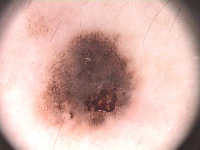</td><td>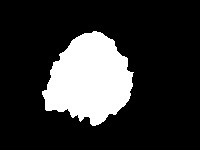</td></tr></table>

2. Разархивируем .rar файл.
3. Обратите внимание, что папка  `PH2 Dataset images` должна лежать там же где и ipynb notebook.

Это фотографии двух типов **поражений кожи:** меланома и родинки.
В данном задании мы не будем заниматься их классификацией, а будем **сегментировать** их.

In [1]:
!wget -c https://www.dropbox.com/s/8lqrloi0mxj2acu/PH2Dataset.rar

# если по ссылке слишком много запросов, датасет можно скачать с kaggle: https://www.kaggle.com/datasets/kanametov/ph2dataset

--2024-02-22 12:12:48--  https://www.dropbox.com/s/8lqrloi0mxj2acu/PH2Dataset.rar
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/8lqrloi0mxj2acu/PH2Dataset.rar [following]
--2024-02-22 12:12:48--  https://www.dropbox.com/s/raw/8lqrloi0mxj2acu/PH2Dataset.rar
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc270a6add5ec6468a27f4163d9f.dl.dropboxusercontent.com/cd/0/inline/CNzLYTPxEJiGOGAGeSG1pTHRNeyfTA5gPTgtQoibtLhf1RrpNZbBX0WOWt0eEYMmYJTCiqgVkOXqlKFwzN4xgrfixwc2d6krrbf5cr6pom0kApucX4cdwuDfgajbyjpuEhM/file# [following]
--2024-02-22 12:12:49--  https://uc270a6add5ec6468a27f4163d9f.dl.dropboxusercontent.com/cd/0/inline/CNzLYTPxEJiGOGAGeSG1pTHRNeyfTA5gPTgtQoibtLhf1RrpNZbBX0WOWt0eEYMmYJTCiqgVkOXqlKFwzN4xgrfixwc2d6krrbf5cr6pom0kApucX4

In [2]:
!ls

PH2Dataset.rar	sample_data


In [3]:
get_ipython().system_raw("unrar x PH2Dataset.rar")

Стуктура датасета у нас следующая:

    IMD_002/
        IMD002_Dermoscopic_Image/
            IMD002.bmp
        IMD002_lesion/
            IMD002_lesion.bmp
        IMD002_roi/
            ...
    IMD_003/
        ...
        ...

 Здесь `X.bmp` — изображение, которое нужно сегментировать, `X_lesion.bmp` — результат сегментации.

Для загрузки датасета можно использовать skimage: [`skimage.io.imread()`](https://scikit-image.org/docs/dev/api/skimage.io.html)

In [4]:
images = []
lesions = []
from skimage.io import imread
import os
root = 'PH2Dataset'

for root, dirs, files in os.walk(os.path.join(root, 'PH2 Dataset images')):
    if root.endswith('_Dermoscopic_Image'):
        images.append(imread(os.path.join(root, files[0])))
    if root.endswith('_lesion'):
        lesions.append(imread(os.path.join(root, files[0])))

Изображения имеют разные размеры. Давайте изменим их размер на $256\times256 $ пикселей. Для изменения размера изображений можно использовать [`skimage.transform.resize()`](https://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.resize).
Эта функция также автоматически нормализует изображения в диапазоне $[0,1]$.


In [5]:
from skimage.transform import resize
size = (256, 256)
X = [resize(x, size, mode='constant', anti_aliasing=True,) for x in images]
Y = [resize(y, size, mode='constant', anti_aliasing=False) > 0.5 for y in lesions]

In [6]:
import numpy as np
X = np.array(X, np.float32)
Y = np.array(Y, np.float32)
print(f'Loaded {len(X)} images')

Loaded 200 images


In [7]:
len(lesions)

200

Чтобы убедиться, что все корректно, мы нарисуем несколько изображений

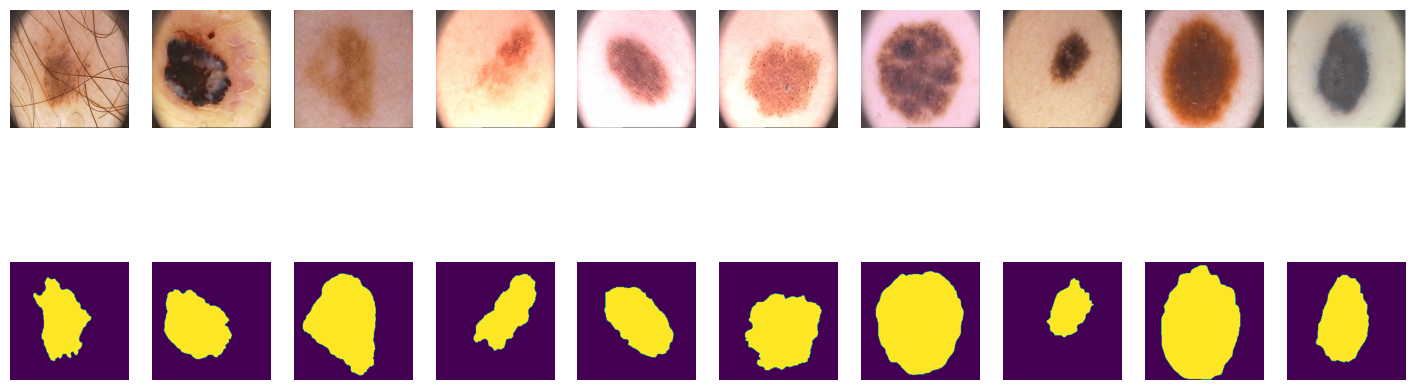

In [8]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

plt.figure(figsize=(18, 6))
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.axis("off")
    plt.imshow(X[i])

    plt.subplot(2, 10, i+11)
    plt.axis("off")
    plt.imshow(Y[i])
plt.show();

Разделим наши 200 картинок на 100/50/50
 для обучения, валидации и теста соответственно

In [9]:
ix = np.random.choice(len(X), len(X), False)
tr, val, ts = np.split(ix, [100, 150])

In [10]:
print(len(tr), len(val), len(ts))

100 50 50


#### PyTorch DataLoader

In [11]:
from torch.utils.data import DataLoader
batch_size = 8
data_tr = DataLoader(list(zip(np.rollaxis(X[tr], 3, 1), Y[tr, np.newaxis])),
                     batch_size=batch_size, shuffle=True)
data_val = DataLoader(list(zip(np.rollaxis(X[val], 3, 1), Y[val, np.newaxis])),
                      batch_size=batch_size, shuffle=True, num_workers=2)
data_ts = DataLoader(list(zip(np.rollaxis(X[ts], 3, 1), Y[ts, np.newaxis])),
                     batch_size=batch_size, shuffle=True, num_workers=2)

In [12]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


# Реализация различных архитектур:
Ваше задание будет состоять в том, чтобы написать несколько нейросетевых архитектур для решения задачи семантической сегментации. Сравнить их по качеству на тесте и испробовать различные лосс функции для них.

-----------------------------------------------------------------------------------------

# SegNet [2 балла]

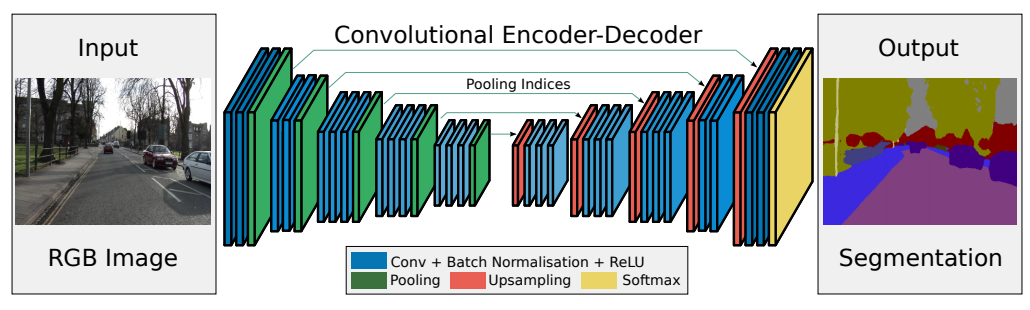

* Badrinarayanan, V., Kendall, A., & Cipolla, R. (2015). [SegNet: A deep convolutional
encoder-decoder architecture for image segmentation](https://arxiv.org/pdf/1511.00561.pdf)

Внимательно посмотрите из чего состоит модель и для чего выбраны те или иные блоки.

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
from torchvision import models
import torch.optim as optim
from time import time

from matplotlib import rcParams
rcParams['figure.figsize'] = (15,4)

In [14]:
class SegNet(nn.Module):
    def __init__(self):
        super().__init__()

        #stage0
        self.enc_conv0 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64, momentum=0.1),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64, momentum=0.1),
            nn.ReLU()
        )
        self.pool0 = nn.MaxPool2d(kernel_size=2, stride=2, return_indices=True)

        #stage1
        self.enc_conv1 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128, momentum=0.1),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128, momentum=0.1),
            nn.ReLU()
        )
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2, return_indices=True)

        #stage2
        self.enc_conv2 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256, momentum=0.1),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256, momentum=0.1),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256, momentum=0.1),
            nn.ReLU()
        )
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2, return_indices=True)

        #stage3
        self.enc_conv3 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512, momentum=0.1),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512, momentum=0.1),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512, momentum=0.1),
            nn.ReLU()
        )
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2, return_indices=True)

        # bottleneck
        self.bottleneck_conv = nn.Sequential(
            nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512,  momentum=0.1),
            nn.ReLU(),
            nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512, momentum=0.1),
            nn.ReLU(),
            nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512, momentum=0.1),
            nn.ReLU()
        )

        self.bottleneck_pool = nn.MaxPool2d(kernel_size=2, stride=2, return_indices=True)
        self.bottleneck_upsample = nn.MaxUnpool2d(kernel_size=2, stride=2)

        self.bottleneck_dec = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding = (1,1)),
            nn.BatchNorm2d(512, momentum=0.1),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding = (1,1)),
            nn.BatchNorm2d(512, momentum=0.1),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding = (1,1)),
            nn.BatchNorm2d(512, momentum=0.1),
            nn.ReLU()
        )


        # decoder (upsampling)
        #upsampling0
        self.upsample0 = nn.MaxUnpool2d(kernel_size=2, stride=2) # 16 -> 32
        self.dec_conv0 = nn.Sequential(
            nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512, momentum=0.1),
            nn.ReLU(),
            nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512, momentum=0.1),
            nn.ReLU(),
            nn.Conv2d(in_channels = 512, out_channels = 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256, momentum=0.1),
            nn.ReLU()
        )

        #upsampling1
        self.upsample1 = nn.MaxUnpool2d(kernel_size=2, stride=2) # 32 -> 64
        self.dec_conv1 = nn.Sequential(
            nn.Conv2d(in_channels = 256, out_channels = 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256, momentum=0.1),
            nn.ReLU(),
            nn.Conv2d(in_channels = 256, out_channels = 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256, momentum=0.1),
            nn.ReLU(),
            nn.Conv2d(in_channels = 256, out_channels = 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128, momentum=0.1),
            nn.ReLU()
        )

        #upsampling2
        self.upsample2 = nn.MaxUnpool2d(kernel_size=2, stride=2) # 64 -> 128
        self.dec_conv2 = nn.Sequential(
            nn.Conv2d(in_channels = 128, out_channels = 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128, momentum=0.1),
            nn.ReLU(),
            nn.Conv2d(in_channels = 128, out_channels = 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64, momentum=0.1),
            nn.ReLU()
        )


        #upsampling3
        self.upsample3 = nn.MaxUnpool2d(kernel_size=2, stride=2)# 128 -> 256
        self.dec_conv3 = nn.Sequential(
            nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64, momentum=0.1),
            nn.ReLU(),
            nn.Conv2d(in_channels = 64, out_channels = 1, kernel_size=3, padding=1)
        )

    def forward(self, x):
        # encoder
        e0 = self.enc_conv0(x)
        e0, ind0 = self.pool0(e0)
        e1 = self.enc_conv1(e0)
        e1, ind1 = self.pool1(e1)
        e2 = self.enc_conv2(e1)
        e2, ind2 = self.pool2(e2)
        e3 = self.enc_conv3(e2)
        e3, ind3 = self.pool3(e3)

        # bottleneck
        b = self.bottleneck_conv(e3)
        b, ind_b = self.bottleneck_pool(b)
        b = self.bottleneck_upsample(b, ind_b)
        b = self.bottleneck_dec(b)



        # decoder
        d0 = self.upsample0(b, ind3)
        d0 = self.dec_conv0(d0)
        d1 = self.upsample1(d0, ind2)
        d1 = self.dec_conv1(d1)
        d2 = self.upsample2(d1, ind1)
        d2 = self.dec_conv2(d2)
        d3 = self.upsample3(d2, ind0)
        d3 = self.dec_conv3(d3) # no activation

        return d3

In [15]:
print(summary(SegNet().to(device), (3, 256, 256)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 256, 256]           1,792
       BatchNorm2d-2         [-1, 64, 256, 256]             128
              ReLU-3         [-1, 64, 256, 256]               0
            Conv2d-4         [-1, 64, 256, 256]          36,928
       BatchNorm2d-5         [-1, 64, 256, 256]             128
              ReLU-6         [-1, 64, 256, 256]               0
         MaxPool2d-7  [[-1, 64, 128, 128], [-1, 64, 128, 128]]               0
            Conv2d-8        [-1, 128, 128, 128]          73,856
       BatchNorm2d-9        [-1, 128, 128, 128]             256
             ReLU-10        [-1, 128, 128, 128]               0
           Conv2d-11        [-1, 128, 128, 128]         147,584
      BatchNorm2d-12        [-1, 128, 128, 128]             256
             ReLU-13        [-1, 128, 128, 128]               0
        MaxPool2d-14  [[

## Метрика

В данном разделе предлагается использовать следующую метрику для оценки качества:

$I o U=\frac{\text {target } \cap \text { prediction }}{\text {target } \cup{prediction }}$

Пересечение (A ∩ B) состоит из пикселей, найденных как в маске предсказания, так и в основной маске истины, тогда как объединение (A ∪ B) просто состоит из всех пикселей, найденных либо в маске предсказания, либо в целевой маске.


Для примера посмотрим на истину (слева) и предсказание (справа):
![alt text](https://www.jeremyjordan.me/content/images/2018/05/target_prediction.png)


Тогда пересечение и объединение будет выглядеть так:

![alt text](https://www.jeremyjordan.me/content/images/2018/05/intersection_union.png)

In [16]:
def iou_pytorch(outputs: torch.Tensor, labels: torch.Tensor):

    outputs = outputs.squeeze(1).byte()  # BATCH x 1 x H x W => BATCH x H x W
    labels = labels.squeeze(1).byte()
    SMOOTH = 1e-8
    intersection = (outputs & labels).float().sum((1, 2))  # Will be zero if Truth=0 or Prediction=0
    union = (outputs | labels).float().sum((1, 2))         # Will be zzero if both are 0

    iou = (intersection + SMOOTH) / (union + SMOOTH)  # We smooth our devision to avoid 0/0

    thresholded = torch.clamp(20 * (iou - 0.5), 0, 10).ceil() / 10  # This is equal to comparing with thresolds

    return thresholded  #

## Функция потерь [1 балл]

Не менее важным, чем построение архитектуры, является определение **оптимизатора** и **функции потерь.**

Функция потерь - это то, что мы пытаемся минимизировать. Многие из них могут быть использованы для задачи бинарной семантической сегментации.

Популярным методом для бинарной сегментации является *бинарная кросс-энтропия*, которая задается следующим образом:

$$\mathcal L_{BCE}(y, \hat y) = -\sum_i \left[y_i\log\sigma(\hat y_i) + (1-y_i)\log(1-\sigma(\hat y_i))\right].$$

где $y$ это  таргет желаемого результата и $\hat y$ является выходом модели. $\sigma$ - это [*логистическая* функция](https://en.wikipedia.org/wiki/Sigmoid_function), который преобразует действительное число $\mathbb R$ в вероятность $[0,1]$.

Однако эта потеря страдает от проблем численной нестабильности. Самое главное, что $\lim_{x\rightarrow0}\log(x)=\infty$ приводит к неустойчивости в процессе оптимизации. Рекомендуется посмотреть следующее [упрощение](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits). Эта функция эквивалентна первой и не так подвержена численной неустойчивости:

$$\mathcal L_{BCE} = \hat y - y\hat y + \log\left(1+\exp(-\hat y)\right).$$

In [17]:
def bce_loss(y_pred, y_real):

    loss = torch.maximum(y_pred, torch.zeros_like(y_pred)) - y_pred*y_real + torch.log(1+torch.exp(-torch.abs(y_pred)))
    return loss.mean((1,2,3)).mean()

## Тренировка [1 балл]

Мы определим цикл обучения в функции, чтобы мы могли повторно использовать его.

In [18]:
import torch
from time import time
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt

def train(model, optimizer, loss_fn, epochs, data_tr, data_val, used_sheduler=True, device='cuda'):
    X_val, Y_val = next(iter(data_val))
    X_val, Y_val = X_val.to(device), Y_val.to(device)
    history = {
        'train': {'loss': [], 'score': []},
        'val': {'loss': [], 'score': []}
    }

    if used_sheduler:
        scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer,
                    milestones=[epochs//3, epochs//2, int(epochs/1.4), int(epochs/1.1)],
                                                         gamma=0.8)

    for epoch in range(epochs):
        tic = time()
        print('* Epoch %d/%d' % (epoch+1, epochs))

        model.train()  # train mode
        train_loss = 0
        train_score = 0
        for X_batch, Y_batch in data_tr:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            optimizer.zero_grad()
            Y_pred = model(X_batch)
            loss = loss_fn(Y_pred, Y_batch)
            loss.backward()
            optimizer.step()
            score = iou_pytorch(torch.sigmoid(Y_pred) > 0.5, Y_batch).mean().item()

            train_loss += loss.item()
            train_score += score

        train_loss /= len(data_tr)
        train_score /= len(data_tr)
        history['train']['loss'].append(train_loss)
        history['train']['score'].append(train_score)

        model.eval()  # validation mode
        with torch.no_grad():
            val_loss = 0
            val_score = 0
            for Xv_batch, Yv_batch in data_val:
                Xv_batch, Yv_batch = Xv_batch.to(device), Yv_batch.to(device)
                Y_pred_val = model(Xv_batch)
                loss_val = loss_fn(Y_pred_val, Yv_batch)
                score_val = iou_pytorch(torch.sigmoid(Y_pred_val) > 0.5, Yv_batch).mean().item()
                val_loss += loss_val.item()
                val_score += score_val

            val_loss /= len(data_val)
            val_score /= len(data_val)
            history['val']['loss'].append(val_loss)
            history['val']['score'].append(val_score)

        toc = time()
        print('Epoch %d/%d - Train loss: %f, Train score: %f, Val loss: %f, Val score: %f, Time: %f' % (epoch+1, epochs, train_loss, train_score, val_loss, val_score, toc - tic))

        if used_sheduler:
            scheduler.step()

        # Visualization of results
        clear_output(wait=True)
        Y_hat = model(X_val).detach().to('cpu')
        for k in range(6):
            plt.subplot(2, 6, k+1)
            plt.imshow(np.rollaxis(X_val[k].cpu().numpy(), 0, 3), cmap='gray')
            plt.title('Real')
            plt.axis('off')

            plt.subplot(2, 6, k+7)
            plt.imshow(Y_hat[k, 0], cmap='gray')
            plt.title('Output')
            plt.axis('off')
        plt.suptitle('%d / %d - loss: %f' % (epoch+1, epochs, train_loss))
        plt.show()

    return history


## Инференс [1 балл]

После обучения модели эту функцию можно использовать для прогнозирования сегментации на новых данных:

In [19]:
def predict(model, data):
    model.eval()  # testing mode
    Y_pred = [ X_batch for X_batch, _ in data]
    return np.array(Y_pred)

In [20]:
def score_model(model, metric, data):
    model.eval()  # testing mode
    scores = 0
    for X_batch, Y_label in data:
        Y_pred = torch.sigmoid(model(X_batch.to(device))) > 0.5
        scores += metric(Y_pred, Y_label.to(device)).mean().item()

    return scores/len(data)

In [21]:
#Функция для вычисления скора на валидации и тесте обученной модели
def scores(model):
    val_score = score_model(model, iou_pytorch, data_val)
    test_score = score_model(model, iou_pytorch, data_ts)
    print(f"\nScore на валидации: {val_score:.4f}, score на тесте: {test_score:.4f}")
    return val_score, test_score

## Основной момент: обучение

Обучите вашу модель. Обратите внимание, что обучать необходимо до сходимости. Если указанного количества эпох (20) не хватило, попробуйте изменять количество эпох до сходимости алгоритма. Сходимость определяйте по изменению функции потерь на валидационной выборке.
 С параметрами оптимизатора можно спокойно играть, пока вы не найдете лучший вариант для себя.


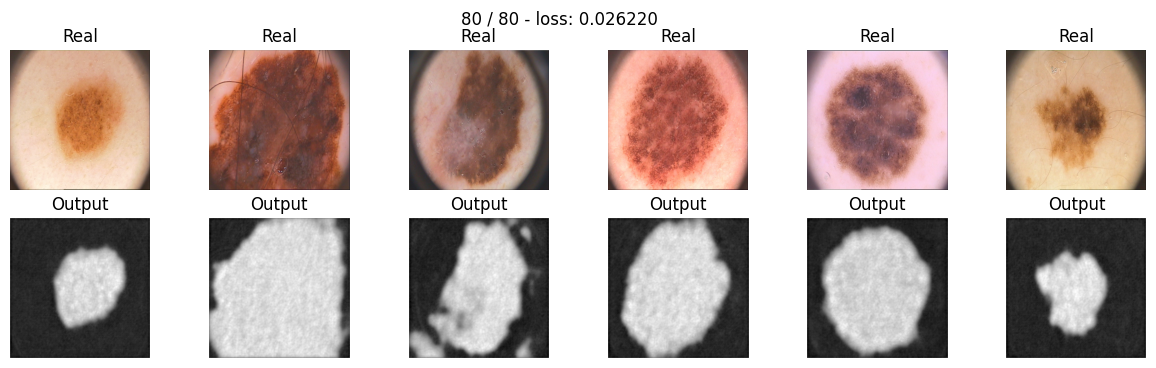

In [22]:
segnet_bce = SegNet().to(device)

max_epochs = 80
optim = torch.optim.AdamW(segnet_bce.parameters(), lr = 1e-4, betas=(0.9, 0.999),
                          eps=1e-8, weight_decay=0.01, amsgrad=False)
tr_segnet_bce = train(segnet_bce, optim, bce_loss, max_epochs, data_tr, data_val,
                      used_sheduler=True)

In [23]:
score_model(segnet_bce, iou_pytorch, data_val)

0.8107143044471741

In [24]:
segnet_bce_val_score, segnet_bce_test_score = scores(segnet_bce)



Score на валидации: 0.8107, score на тесте: 0.8250


Ответьте себе на вопрос: не переобучается ли моя модель?

-----------------------------------------------------------------------------------------

## Дополнительные функции потерь [2 балла]

 В данном разделе вам потребуется имплементировать две функции потерь:
 DICE и Focal loss.
 Если у вас что-то не учится, велика вероятность, что вы ошиблись или учите слишком мало эпох, прежде чем бить тревогу попробуйте перебрать различные варианты и убедитесь, что во всех других сетапах сеть достигает желанного результата. СПОЙЛЕР: учиться она будет при всех лоссах, предложенных в этом задании.


**1. Dice coefficient:** Учитывая две маски $X$ и $Y$, общая метрика для измерения расстояния между этими двумя масками задается следующим образом:

$$D(X,Y)=\frac{2|X\cap Y|}{|X|+|Y|}$$

Эта функция не является дифференцируемой, но это необходимое свойство для градиентного спуска. В данном случае мы можем приблизить его с помощью:

$$\mathcal L_D(X,Y) = 1-\frac{1}{256 \times 256} \times \frac{\sum_i2X_iY_i}{\sum_iX_i+Y_i}.$$

Не забудьте подумать о численной нестабильности, возникающей в математической формуле.


In [25]:
def dice_loss(y_pred, y_real, smooth=1): #параметр smooth решает проблему возможной нестабильности функции
    y_pred = torch.sigmoid(y_pred)
    num = (2*y_pred*y_real).sum((1,2,3)) + smooth
    den = (y_pred + y_real).sum((1,2,3)) + smooth
    res = 1 - (num/den).mean()
    return res

Проводим тестирование:

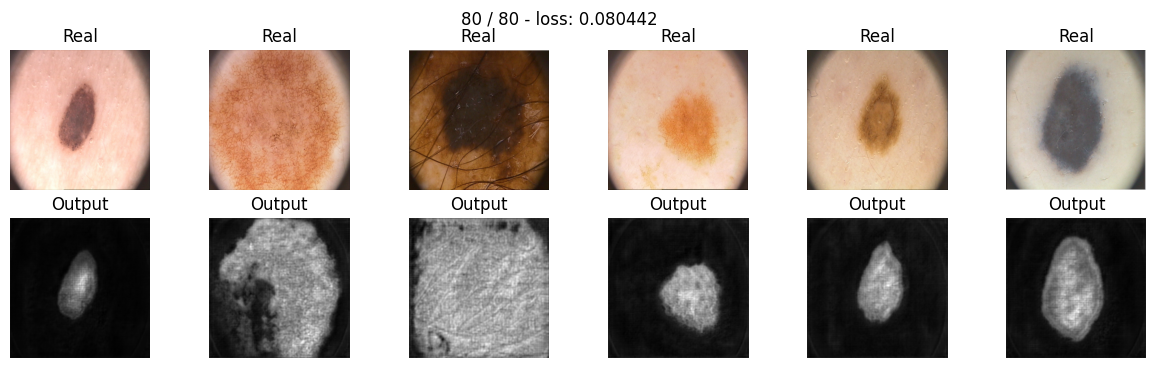

In [26]:
segnet_dice = SegNet().to(device)

max_epochs = 80
optimaizer = torch.optim.AdamW(segnet_dice.parameters())
tr_segne_dice = train(segnet_dice, optimaizer, dice_loss, max_epochs, data_tr, data_val,
                      used_sheduler=True)

In [27]:
score_model(segnet_dice, iou_pytorch, data_val)

0.723214294229235

In [28]:
segnet_dice_val_score, segnet_dice_test_score = scores(segnet_dice)


Score на валидации: 0.7232, score на тесте: 0.8304


[**2. Focal loss:**](https://arxiv.org/pdf/1708.02002.pdf)

Окей, мы уже с вами умеем делать BCE loss:

$$\mathcal L_{BCE}(y, \hat y) = -\sum_i \left[y_i\log\sigma(\hat y_i) + (1-y_i)\log(1-\sigma(\hat y_i))\right].$$

Проблема с этой потерей заключается в том, что она имеет тенденцию приносить пользу классу **большинства** (фоновому) по отношению к классу **меньшинства** ( переднему). Поэтому обычно применяются весовые коэффициенты к каждому классу:

$$\mathcal L_{wBCE}(y, \hat y) = -\sum_i \alpha_i\left[y_i\log\sigma(\hat y_i) + (1-y_i)\log(1-\sigma(\hat y_i))\right].$$

Традиционно вес $\alpha_i$ определяется как обратная частота класса этого пикселя $i$, так что наблюдения миноритарного класса весят больше по отношению к классу большинства.

Еще одним недавним дополнением является взвешенный пиксельный вариант, которая взвешивает каждый пиксель по степени уверенности, которую мы имеем в предсказании этого пикселя.

$$\mathcal L_{focal}(y, \hat y) = -\sum_i \left[\left(1-\sigma(\hat y_i)\right)^\gamma y_i\log\sigma(\hat y_i) + (1-y_i)\log(1-\sigma(\hat y_i))\right].$$

Зафиксируем значение $\gamma=2$.

--------------------------------------------------------------------------------


In [29]:
def focal_loss(y_pred, y_real, eps = -1, gamma = 2):
    p = torch.sigmoid(y_pred)
    ce_loss = torch.maximum(y_pred, torch.zeros_like(y_pred)) - y_pred*y_real + torch.log(1+torch.exp(-torch.abs(y_pred)))
    # ce_loss = F.binary_cross_entropy_with_logits(y_pred, y_real, reduction="none")
    p_t = p * y_real + (1 - p) * (1 - y_real)
    loss = ce_loss * ((1 - p_t) ** gamma)
    if eps >= 0:
        alpha_t = eps * y_real + (1 - eps) * (1 - y_real)
        loss = alpha_t * loss
    loss = loss.mean((1,2,3)).mean()
    return loss

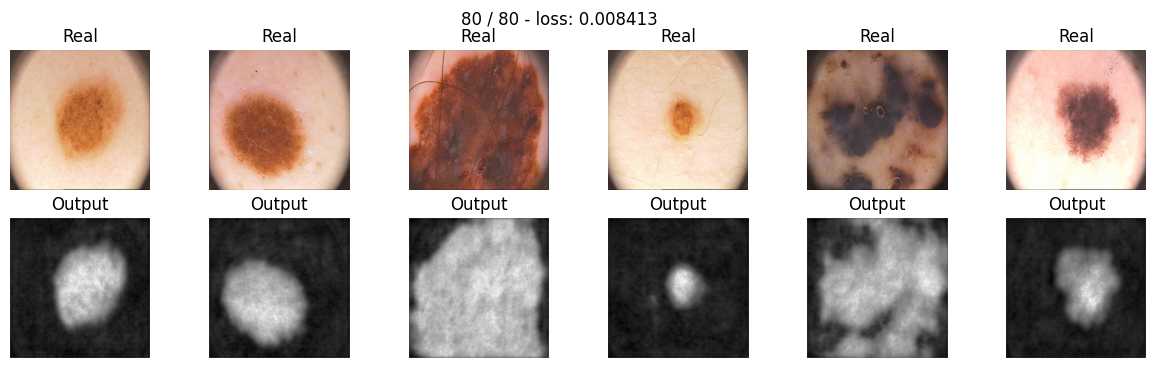

In [30]:
segnet_focal = SegNet().to(device)

max_epochs = 80
optimaizer = torch.optim.AdamW(segnet_focal.parameters(), lr = 1e-4, betas=(0.9, 0.999),
                          eps=1e-8, weight_decay=0.01, amsgrad=False)
tr_segnet_focal = train(segnet_focal, optimaizer, focal_loss, max_epochs, data_tr,
                        data_val, used_sheduler=True)

In [31]:
score_model(segnet_focal, iou_pytorch, data_val)

0.7660714302744184

In [32]:
segnet_focal_val_score, segnet_focal_test_score = scores(segnet_focal)


Score на валидации: 0.7821, score на тесте: 0.8143


----------------------------------------------------------------------------------------------

## [BONUS] Мир сегментационных лоссов [5 баллов]

В данном блоке предлагаем вам написать одну функцию потерь самостоятельно. Для этого необходимо прочитать статью и имплементировать ее. Кроме тако провести численное сравнение с предыдущими функциями.
Какие варианты?

1) Можно учесть Total Variation
2) Lova
3) BCE но с Soft Targets (что-то типа label-smoothing для многослассовой классификации)
4) Любой другой

* [Physiological Inspired Deep Neural Networks for Emotion Recognition](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=8472816&tag=1)". IEEE Access, 6, 53930-53943.

* [Boundary loss for highly unbalanced segmentation](https://arxiv.org/abs/1812.07032)

* [Tversky loss function for image segmentation using 3D fully convolutional deep networks](https://arxiv.org/abs/1706.05721)

* [Correlation Maximized Structural Similarity Loss for Semantic Segmentation](https://arxiv.org/abs/1910.08711)

* [Topology-Preserving Deep Image Segmentation](https://papers.nips.cc/paper/8803-topology-preserving-deep-image-segmentation)

Так как Тверский лосс очень похож на данные выше, то за него будет проставлено только 3 балла (при условии, если в модели нет ошибок при обучении). Постарайтесь сделать что-то интереснее.

Тверский лосс:

In [33]:
def tversky_loss(y_pred, y_real, alpha = 0.5, beta = 0.5, gamma = 1, smooth=1):

        #comment out if your model contains a sigmoid or equivalent activation layer
        y_pred = F.sigmoid(y_pred)

        #flatten label and prediction tensors
        y_pred = y_pred.view(-1)
        y_real = y_real.view(-1)

        #True Positives, False Positives & False Negatives
        TP = (y_pred * y_real).sum()
        FP = ((1-y_real) * y_pred).sum()
        FN = (y_real * (1-y_pred)).sum()

        tversky = (TP + smooth) / (TP + alpha*FP + beta*FN + smooth)
        loss = (1 - tversky)**gamma

        return loss

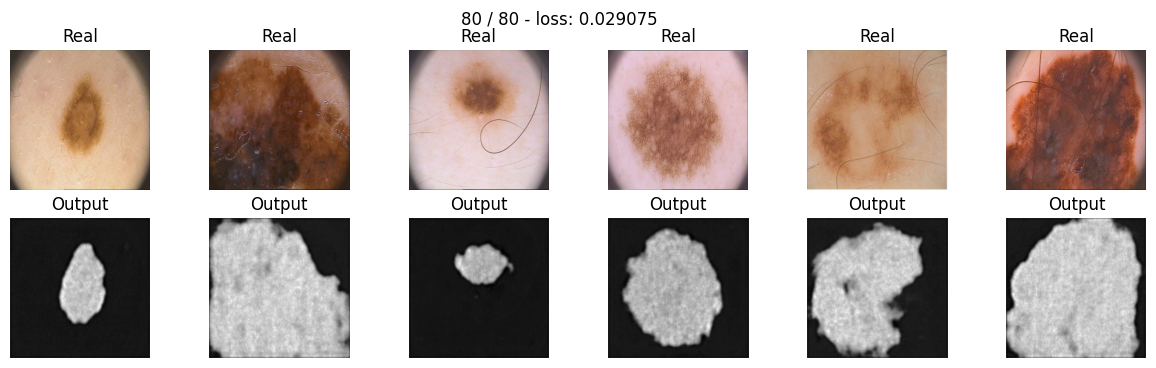

In [34]:
segnet_tversky = SegNet().to(device)

max_epochs = 80
optimaizer = torch.optim.AdamW(segnet_tversky.parameters(), lr = 1e-4,
                               betas=(0.9, 0.999),
                          eps=1e-8, weight_decay=0.01, amsgrad=False)
tr_segnet_tversky = train(segnet_tversky, optimaizer, tversky_loss, max_epochs,
                          data_tr, data_val,used_sheduler=True)

In [35]:
score_model(segnet_tversky, iou_pytorch, data_val)

0.7732143146651131

In [36]:
segnet_tversky_val_score, segnet_tversky_test_score = scores(segnet_tversky)


Score на валидации: 0.7786, score на тесте: 0.8375


-----------------------------------------------------------------------------------------

# U-Net [2 балла]

[**U-Net**](https://arxiv.org/abs/1505.04597) — это архитектура нейронной сети, которая получает изображение и выводит его. Первоначально он был задуман для семантической сегментации (как мы ее будем использовать), но он настолько успешен, что с тех пор используется в других контекстах. Получая на вход медицинское изображение, он выведет изображение в оттенках серого, где интенсивность каждого пикселя зависит от вероятности того, что этот пиксель принадлежит интересующей нас области.

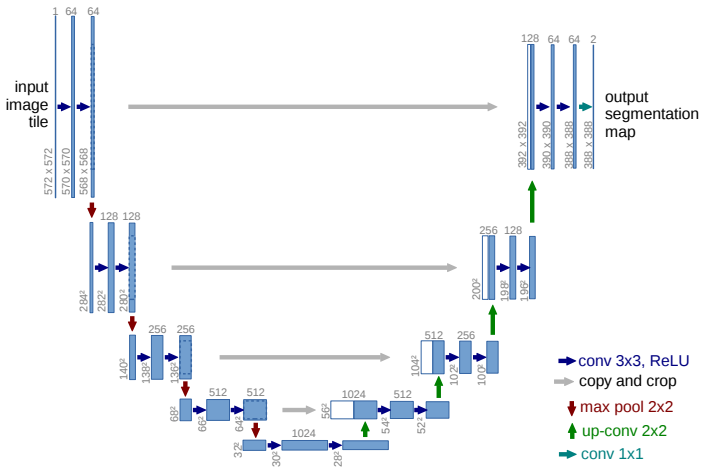

У нас в архитектуре все так же существует энкодер и декодер, как в **SegNet**, но отличительной особеностью данной модели являются *skip-conenctions*, соединяющие части декодера и энкодера. То есть для того чтобы передать на вход декодера тензор, мы конкатенируем симметричный выход с энкодера и выход предыдущего слоя декодера.

* Ronneberger, Olaf, Philipp Fischer, and Thomas Brox. "[U-Net: Convolutional networks for biomedical image segmentation.](https://arxiv.org/pdf/1505.04597.pdf)" International Conference on Medical image computing and computer-assisted intervention. Springer, Cham, 2015.

In [37]:
class UNet(nn.Module):
    def __init__(self):
        super().__init__()

        input_nbr = 3 #Число каналов входного изображения
        num_ch = 64 #Число каналов после свертки
        batchNorm_momentum = 0.1

        # encoder (downsampling)
        self.enc_conv0 = nn.Sequential(
            nn.Conv2d(in_channels=input_nbr, out_channels = num_ch, kernel_size=3, padding = (1,1)),
            nn.BatchNorm2d(num_ch, momentum= batchNorm_momentum),
            nn.ReLU(),
            nn.Conv2d(in_channels=num_ch, out_channels=num_ch, kernel_size=3, padding = (1,1)),
            nn.BatchNorm2d(num_ch, momentum= batchNorm_momentum),
            nn.ReLU()
        )

        self.pool0 = nn.MaxPool2d(kernel_size = 2, return_indices = False)

        self.enc_conv1 = nn.Sequential(
            nn.Conv2d(in_channels = num_ch, out_channels = num_ch*2, kernel_size=3, padding = (1,1)),
            nn.BatchNorm2d(num_ch*2, momentum= batchNorm_momentum),
            nn.ReLU(),
            nn.Conv2d(in_channels=num_ch*2, out_channels=num_ch*2, kernel_size=3, padding = (1,1)),
            nn.BatchNorm2d(num_ch*2, momentum= batchNorm_momentum),
            nn.ReLU()
        )

        self.pool1 = nn.MaxPool2d(kernel_size = 2, return_indices = False)

        self.enc_conv2 = nn.Sequential(
            nn.Conv2d(in_channels= num_ch*2, out_channels=num_ch*4, kernel_size=3, padding = (1,1)),
            nn.BatchNorm2d(num_ch*4, momentum= batchNorm_momentum),
            nn.ReLU(),
            nn.Conv2d(in_channels=num_ch*4, out_channels=num_ch*4, kernel_size=3, padding = (1,1)),
            nn.BatchNorm2d(num_ch*4, momentum= batchNorm_momentum),
            nn.ReLU()
        )

        self.pool2 = nn.MaxPool2d(kernel_size = 2, return_indices = False)

        self.enc_conv3 = nn.Sequential(
            nn.Conv2d(in_channels=num_ch*4, out_channels=num_ch*8, kernel_size=3, padding = (1,1)),
            nn.BatchNorm2d(num_ch*8, momentum= batchNorm_momentum),
            nn.ReLU(),
            nn.Conv2d(in_channels=num_ch*8, out_channels=num_ch*8, kernel_size=3, padding = (1,1)),
            nn.BatchNorm2d(num_ch*8, momentum= batchNorm_momentum),
            nn.ReLU()
        )

        self.pool3 = nn.MaxPool2d(kernel_size = 2, return_indices = False)


        self.bottleneck_enc = nn.Sequential(
            nn.Conv2d(in_channels=num_ch*8, out_channels=num_ch*16, kernel_size=3, padding = (1,1)),
            nn.BatchNorm2d(num_ch*16, momentum= batchNorm_momentum),
            nn.ReLU(),
            nn.Conv2d(in_channels=num_ch*16, out_channels=num_ch*8, kernel_size=3, padding = (1,1)),
            nn.BatchNorm2d(num_ch*8, momentum= batchNorm_momentum),
            nn.ReLU()
        )


        # decoder (upsampling)
        self.upsample0 =  nn.Upsample(scale_factor=2)

        self.dec_conv0 =  nn.Sequential(
            nn.Conv2d(in_channels=num_ch*16, out_channels=num_ch*8, kernel_size=3, padding = (1,1)),
            nn.BatchNorm2d(num_ch*8, momentum= batchNorm_momentum),
            nn.ReLU(),
            nn.Conv2d(in_channels=num_ch*8, out_channels=num_ch*4, kernel_size=3, padding = (1,1)),
            nn.BatchNorm2d(num_ch*4, momentum= batchNorm_momentum),
            nn.ReLU()
        )

        self.upsample1 =  nn.Upsample(scale_factor=2)

        self.dec_conv1 =  nn.Sequential(
            nn.Conv2d(in_channels=num_ch*8, out_channels=num_ch*4, kernel_size=3, padding = (1,1)),
            nn.BatchNorm2d(num_ch*4, momentum= batchNorm_momentum),
            nn.ReLU(),
            nn.Conv2d(in_channels=num_ch*4, out_channels=num_ch*2, kernel_size=3, padding = (1,1)),
            nn.BatchNorm2d(num_ch*2, momentum= batchNorm_momentum),
            nn.ReLU()
        )

        self.upsample2 =  nn.Upsample(scale_factor=2)

        self.dec_conv2 =  nn.Sequential(
            nn.Conv2d(in_channels=num_ch*4, out_channels=num_ch*2, kernel_size=3, padding = (1,1)),
            nn.BatchNorm2d(num_ch*2, momentum= batchNorm_momentum),
            nn.ReLU(),
            nn.Conv2d(in_channels=num_ch*2, out_channels=num_ch, kernel_size=3, padding = (1,1)),
            nn.BatchNorm2d(num_ch, momentum= batchNorm_momentum),
            nn.ReLU()
        )

        self.upsample3 = nn.Upsample(scale_factor=2)

        self.dec_conv3 =  nn.Sequential(
            nn.Conv2d(in_channels=num_ch*2, out_channels=num_ch, kernel_size=3, padding = (1,1)),
            nn.BatchNorm2d(num_ch, momentum= batchNorm_momentum),
            nn.ReLU(),
            nn.Conv2d(in_channels=num_ch, out_channels=num_ch, kernel_size=3, padding = (1,1)),
            nn.BatchNorm2d(num_ch, momentum= batchNorm_momentum),
            nn.ReLU(),
            nn.Conv2d(in_channels=num_ch, out_channels=1, kernel_size=1)
        )



    def forward(self, x):
        # encoder
        e0 = self.enc_conv0(x)
        e1 = self.pool0(e0)
        e2 = self.enc_conv1(e1)
        e3 = self.pool1(e2)
        e4 = self.enc_conv2(e3)
        e5 = self.pool2(e4)
        e6 = self.enc_conv3(e5)
        e7 = self.pool3(e6)

        # bottleneck
        b = self.bottleneck_enc(e7)

        # decoder
        d0 = self.upsample0(b)
        d0 = self.dec_conv0(torch.cat((d0,e6), dim =1))
        d1 = self.upsample1(d0)
        d1 = self.dec_conv1(torch.cat((d1,e4), dim =1))
        d2 = self.upsample2(d1)
        d2 = self.dec_conv2(torch.cat((d2,e2), dim =1))
        d3 = self.upsample3(d2)
        d3 = self.dec_conv3(torch.cat((d3,e0), dim =1))
        return d3

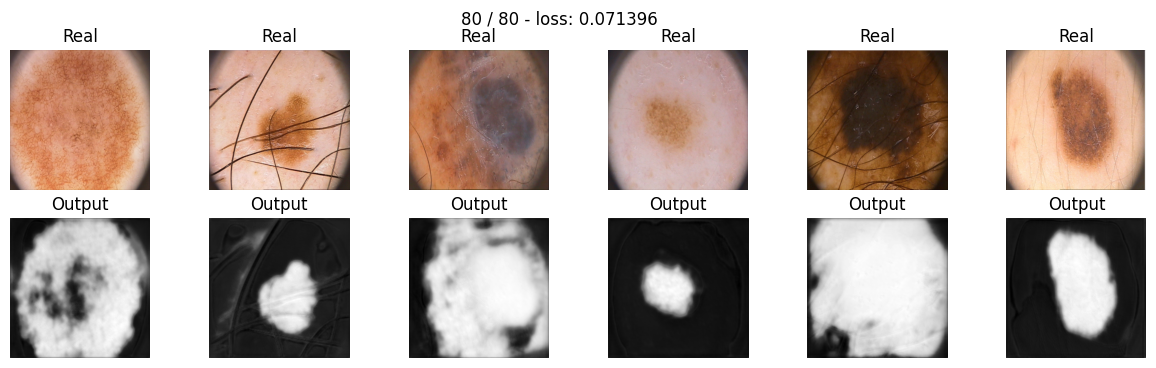

In [38]:
unet_bce = UNet().to(device)

max_epochs = 80
optimaizer = torch.optim.AdamW(unet_bce.parameters(), lr = 1e-4,
                               betas=(0.9, 0.999),
                          eps=1e-8, weight_decay=0.01, amsgrad=False)
tr_unet_bce = train(unet_bce, optimaizer, bce_loss, max_epochs,
                    data_tr, data_val, used_sheduler=True)

In [39]:
score_model(unet_bce, iou_pytorch, data_val)

0.8232143095561436

In [40]:
unet_bce_val_score, unet_bce_test_score = scores(unet_bce)


Score на валидации: 0.8393, score на тесте: 0.8607


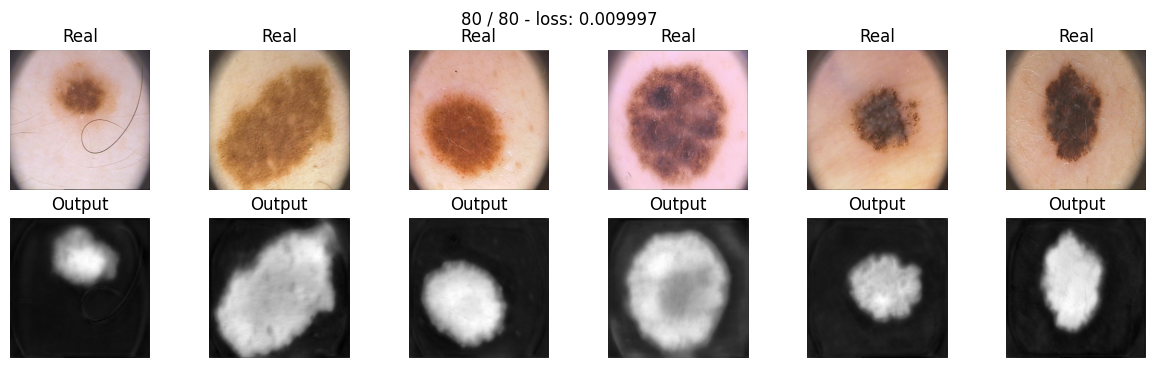

In [41]:
unet_focal = UNet().to(device)

max_epochs = 80
optimaizer = torch.optim.AdamW(unet_focal.parameters(), lr = 1e-4,
                               betas=(0.9, 0.999),
                          eps=1e-8, weight_decay=0.01, amsgrad=False)
tr_unet_focal = train(unet_focal, optimaizer, focal_loss, max_epochs,
                    data_tr, data_val, used_sheduler=True)

In [42]:
score_model(unet_focal, iou_pytorch, data_val)

0.8071428622518267

In [43]:
unet_focal_val_score, unet_focal_test_score = scores(unet_focal)


Score на валидации: 0.8286, score на тесте: 0.8536


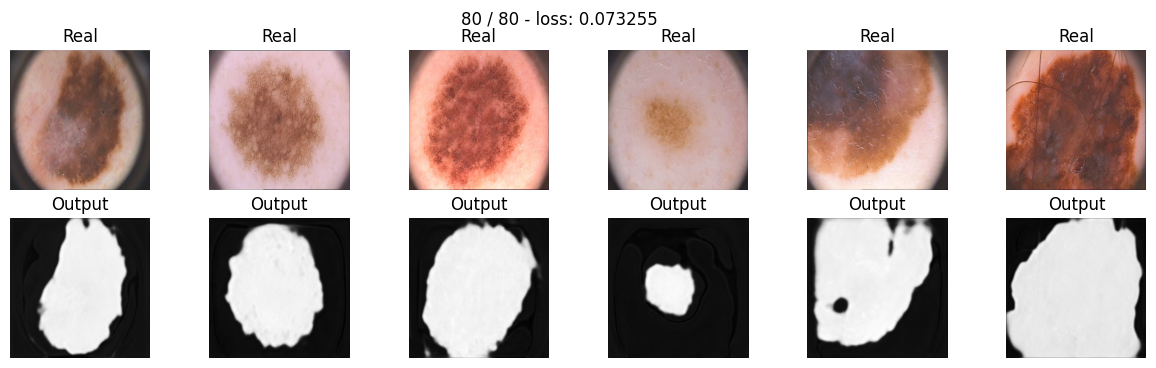

In [44]:
unet_tversky = UNet().to(device)

max_epochs = 80
optimaizer = torch.optim.AdamW(unet_tversky.parameters(), lr = 1e-4,
                               betas=(0.9, 0.999),
                          eps=1e-8, weight_decay=0.01, amsgrad=False)
tr_unet_tversky = train(unet_tversky, optimaizer, tversky_loss, max_epochs,
                    data_tr, data_val, used_sheduler=True)

In [45]:
score_model(unet_tversky, iou_pytorch, data_val)

0.8250000051089695

In [46]:
unet_tversky_val_score, unet_tversky_test_score = scores(unet_tversky)


Score на валидации: 0.8196, score на тесте: 0.8429


Новая модель путем изменения типа пулинга:

 **Max-Pooling** for the downsampling and **nearest-neighbor Upsampling** for the upsampling.

Down-sampling:

        conv = nn.Conv2d(3, 64, 3, padding=1)
        pool = nn.MaxPool2d(3, 2, padding=1)

Up-Sampling

        upsample = nn.Upsample(32)
        conv = nn.Conv2d(64, 64, 3, padding=1)

Замените max-pooling на convolutions с stride=2 и upsampling на transpose-convolutions с stride=2.


In [47]:
class UNet2(nn.Module):
    def __init__(self):
        super().__init__()

        input_nbr = 3 #Число каналов входного изображения
        num_ch = 64 #Число каналов после свертки
        batchNorm_momentum = 0.1

        # encoder (downsampling)
        self.enc_conv0 = nn.Sequential(
            nn.Conv2d(in_channels=input_nbr, out_channels = num_ch, kernel_size=3, padding = (1,1)),
            nn.BatchNorm2d(num_ch, momentum= batchNorm_momentum),
            nn.ReLU(),
            nn.Conv2d(in_channels=num_ch, out_channels=num_ch, kernel_size=3, padding = (1,1)),
            nn.BatchNorm2d(num_ch, momentum= batchNorm_momentum),
            nn.ReLU()
        )

        self.pool0 = nn.Sequential(nn.Conv2d(in_channels=num_ch, out_channels = num_ch,
                                             kernel_size = 2, stride = 2),
        nn.BatchNorm2d(num_ch),
        nn.ReLU()
        )

        self.enc_conv1 = nn.Sequential(
            nn.Conv2d(in_channels = num_ch, out_channels = num_ch*2, kernel_size=3, padding = (1,1)),
            nn.BatchNorm2d(num_ch*2, momentum= batchNorm_momentum),
            nn.ReLU(),
            nn.Conv2d(in_channels=num_ch*2, out_channels=num_ch*2, kernel_size=3, padding = (1,1)),
            nn.BatchNorm2d(num_ch*2, momentum= batchNorm_momentum),
            nn.ReLU()
        )

        self.pool1 = nn.Sequential(nn.Conv2d(in_channels=num_ch*2, out_channels = num_ch*2,
                                             kernel_size = 2, stride = 2),
        nn.BatchNorm2d(num_ch*2),
        nn.ReLU()
        )

        self.enc_conv2 = nn.Sequential(
            nn.Conv2d(in_channels= num_ch*2, out_channels=num_ch*4, kernel_size=3, padding = (1,1)),
            nn.BatchNorm2d(num_ch*4, momentum= batchNorm_momentum),
            nn.ReLU(),
            nn.Conv2d(in_channels=num_ch*4, out_channels=num_ch*4, kernel_size=3, padding = (1,1)),
            nn.BatchNorm2d(num_ch*4, momentum= batchNorm_momentum),
            nn.ReLU()
        )

        self.pool2 = nn.Sequential(nn.Conv2d(in_channels=num_ch*4, out_channels = num_ch*4,
                                             kernel_size = 2, stride = 2),
        nn.BatchNorm2d(num_ch*4),
        nn.ReLU()
        )

        self.enc_conv3 = nn.Sequential(
            nn.Conv2d(in_channels=num_ch*4, out_channels=num_ch*8, kernel_size=3, padding = (1,1)),
            nn.BatchNorm2d(num_ch*8, momentum= batchNorm_momentum),
            nn.ReLU(),
            nn.Conv2d(in_channels=num_ch*8, out_channels=num_ch*8, kernel_size=3, padding = (1,1)),
            nn.BatchNorm2d(num_ch*8, momentum= batchNorm_momentum),
            nn.ReLU()
        )

        self.pool3 = nn.Sequential(nn.Conv2d(in_channels=num_ch*8, out_channels = num_ch*8,
                                             kernel_size = 2, stride = 2),
        nn.BatchNorm2d(num_ch*8),
        nn.ReLU()
        )


        self.bottleneck_enc = nn.Sequential(
            nn.Conv2d(in_channels=num_ch*8, out_channels=num_ch*16, kernel_size=3, padding = (1,1)),
            nn.BatchNorm2d(num_ch*16, momentum= batchNorm_momentum),
            nn.ReLU(),
            nn.Conv2d(in_channels=num_ch*16, out_channels=num_ch*8, kernel_size=3, padding = (1,1)),
            nn.BatchNorm2d(num_ch*8, momentum= batchNorm_momentum),
            nn.ReLU()
        )


        # decoder (upsampling)
        self.upsample0 =  nn.Upsample(scale_factor=2)

        self.dec_conv0 =  nn.Sequential(
            nn.Conv2d(in_channels=num_ch*16, out_channels=num_ch*8, kernel_size=3, padding = (1,1)),
            nn.BatchNorm2d(num_ch*8, momentum= batchNorm_momentum),
            nn.ReLU(),
            nn.Conv2d(in_channels=num_ch*8, out_channels=num_ch*4, kernel_size=3, padding = (1,1)),
            nn.BatchNorm2d(num_ch*4, momentum= batchNorm_momentum),
            nn.ReLU()
        )

        self.upsample1 =  nn.Upsample(scale_factor=2)

        self.dec_conv1 =  nn.Sequential(
            nn.Conv2d(in_channels=num_ch*8, out_channels=num_ch*4, kernel_size=3, padding = (1,1)),
            nn.BatchNorm2d(num_ch*4, momentum= batchNorm_momentum),
            nn.ReLU(),
            nn.Conv2d(in_channels=num_ch*4, out_channels=num_ch*2, kernel_size=3, padding = (1,1)),
            nn.BatchNorm2d(num_ch*2, momentum= batchNorm_momentum),
            nn.ReLU()
        )

        self.upsample2 =  nn.Upsample(scale_factor=2)

        self.dec_conv2 =  nn.Sequential(
            nn.Conv2d(in_channels=num_ch*4, out_channels=num_ch*2, kernel_size=3, padding = (1,1)),
            nn.BatchNorm2d(num_ch*2, momentum= batchNorm_momentum),
            nn.ReLU(),
            nn.Conv2d(in_channels=num_ch*2, out_channels=num_ch, kernel_size=3, padding = (1,1)),
            nn.BatchNorm2d(num_ch, momentum= batchNorm_momentum),
            nn.ReLU()
        )

        self.upsample3 = nn.Upsample(scale_factor=2)

        self.dec_conv3 =  nn.Sequential(
            nn.Conv2d(in_channels=num_ch*2, out_channels=num_ch, kernel_size=3, padding = (1,1)),
            nn.BatchNorm2d(num_ch, momentum= batchNorm_momentum),
            nn.ReLU(),
            nn.Conv2d(in_channels=num_ch, out_channels=num_ch, kernel_size=3, padding = (1,1)),
            nn.BatchNorm2d(num_ch, momentum= batchNorm_momentum),
            nn.ReLU(),
            nn.Conv2d(in_channels=num_ch, out_channels=1, kernel_size=1)
        )



    def forward(self, x):
        # encoder
        e0 = self.enc_conv0(x)
        e1 = self.pool0(e0)
        e2 = self.enc_conv1(e1)
        e3 = self.pool1(e2)
        e4 = self.enc_conv2(e3)
        e5 = self.pool2(e4)
        e6 = self.enc_conv3(e5)
        e7 = self.pool3(e6)

        # bottleneck
        b = self.bottleneck_enc(e7)

        # decoder
        d0 = self.upsample0(b)
        d0 = self.dec_conv0(torch.cat((d0,e6), dim =1))
        d1 = self.upsample1(d0)
        d1 = self.dec_conv1(torch.cat((d1,e4), dim =1))
        d2 = self.upsample2(d1)
        d2 = self.dec_conv2(torch.cat((d2,e2), dim =1))
        d3 = self.upsample3(d2)
        d3 = self.dec_conv3(torch.cat((d3,e0), dim =1))
        return d3

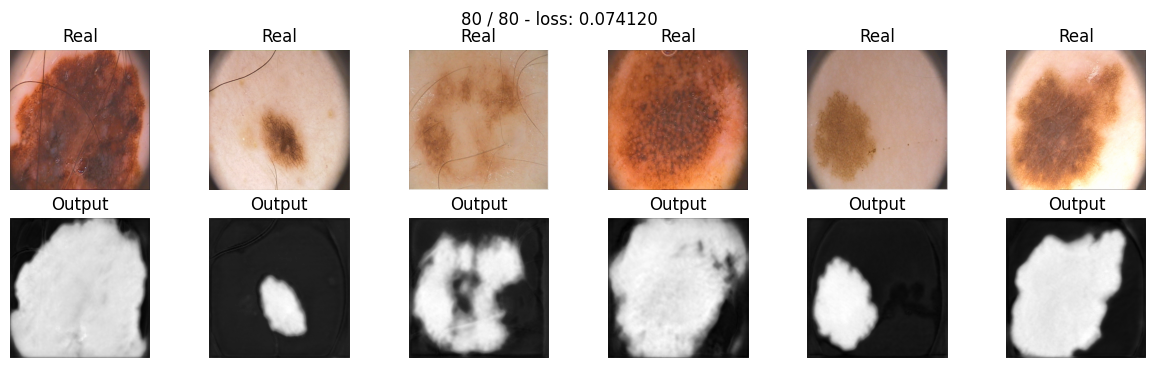

In [48]:
unet2_bce = UNet2().to(device)

max_epochs = 80
optimaizer = torch.optim.AdamW(unet2_bce.parameters(), lr = 1e-4,
                               betas=(0.9, 0.999),
                          eps=1e-8, weight_decay=0.01, amsgrad=False)
tr_unet2_bce = train(unet2_bce, optimaizer, bce_loss, max_epochs,
                     data_tr, data_val, used_sheduler=True)

In [49]:
score_model(unet2_bce, iou_pytorch, data_val)

0.8142857210976737

In [50]:
unet2_bce_val_score, unet2_bce_test_score = scores(unet2_bce)


Score на валидации: 0.7821, score на тесте: 0.8446


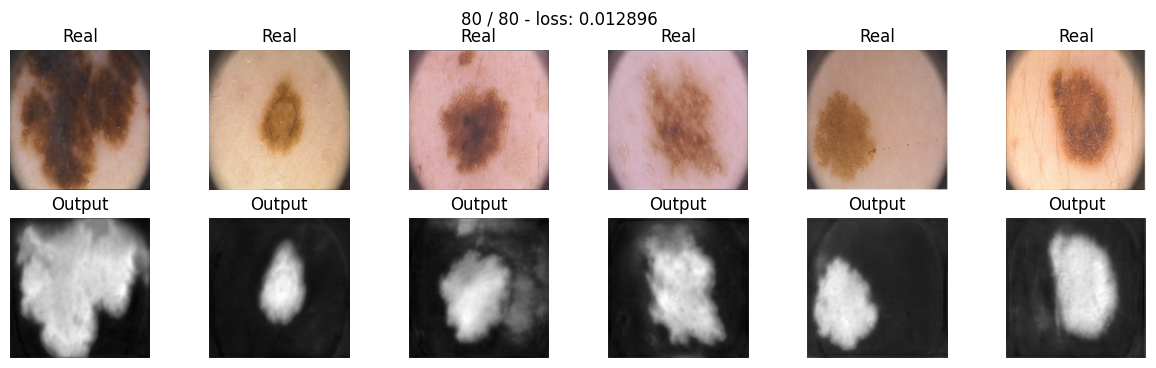

In [51]:
unet2_focal = UNet2().to(device)

max_epochs = 80
optimaizer = torch.optim.AdamW(unet2_focal.parameters(), lr = 1e-4,
                               betas=(0.9, 0.999),
                          eps=1e-8, weight_decay=0.01, amsgrad=False)
tr_unet2_focal = train(unet2_focal, optimaizer, focal_loss, max_epochs,
                     data_tr, data_val, used_sheduler=True)

In [52]:
score_model(unet2_focal, iou_pytorch, data_val)

0.8267857347215924

In [53]:
unet2_focal_val_score, unet2_focal_test_score = scores(unet2_focal)


Score на валидации: 0.8214, score на тесте: 0.7768


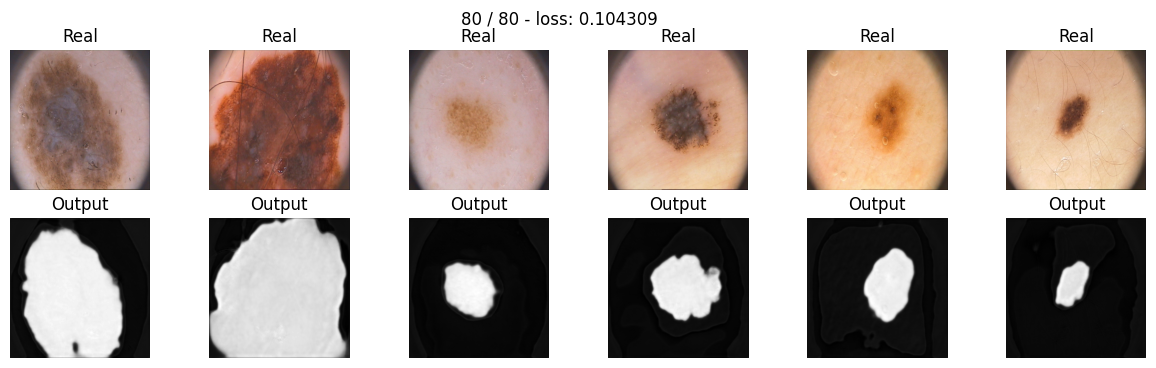

In [54]:
unet2_tversky = UNet2().to(device)

max_epochs = 80
optimaizer = torch.optim.AdamW(unet2_tversky.parameters(), lr = 1e-4,
                               betas=(0.9, 0.999),
                          eps=1e-8, weight_decay=0.01, amsgrad=False)
tr_unet2_tversky = train(unet2_tversky, optimaizer, tversky_loss, max_epochs,
                     data_tr, data_val, used_sheduler=True)

In [ ]:
score_model(unet2_tversky, iou_pytorch, data_val)

In [ ]:
unet2_tversky_val_score, unet2_tversky_test_score = scores(unet2_tversky)

Сделайте вывод, какая из моделей лучше

# Отчет (6 баллов):
Ниже предлагается написать отчет о проделанно работе и построить графики для лоссов, метрик на валидации и тесте.
Если вы пропустили какую-то часть в задании выше, то вы все равно можете получить основную часть баллов в отчете, если правильно зададите проверяемые вами гипотезы.


Аккуратно сравните модели между собой и соберите наилучшую архитектуру. Проверьте каждую модель с различными лоссами. Мы не ограничиваем вас в формате отчета, но проверяющий должен отчетливо понять для чего построен каждый график, какие выводы вы из него сделали и какой общий вывод можно сделать на основании данных моделей. Если вы захотите добавить что-то еще, чтобы увеличить шансы получения максимального балла, то добавляйте отдельное сравнение.

Дополнительные комментарии:

Пусть у вас есть N обученных моделей.
- Является ли отчетом N графиков с 1 линей? Да, но очень низкокачественным, потому что проверяющий не сможет сам сравнить их.

- Является ли отчетом 1 график с N линиями? Да, но скорее всего таким образом вы отразили лишь один эффект. Этого мало, чтобы сделать досточно суждений по поводу вашей работа.

- Я проверял метрики на трейне, и привел в результате таблицу с N числами, что не так? ключейвой момент тут, что вы измеряли на трейне ваши метрики, уверены ли вы, что заивисмости останутся такими же на отложенной выборке?

- Я сделал отчет содержащий график лоссов и метрик, и у меня нет ошибок в основной части, но за отчет не стоит максимум, почему? Естестественно максимум баллов за отчет можно получить не за 2 графика (даже при условии их полной правильности). Проверяющий хочет видеть больше сравнений моделей, чем метрики и лоссы (особенно, если они на трейне).

Советы: попробуйте правильно поставить вопрос на который вы себе отвечаете и продемонстрировать таблицу/график, помогающий проверяющему увидеть ответ на этот вопрос. Пример: Ваня хочет узнать, с каким из 4-х лоссов модель (например, U-Net) имеет наилучшее качество. Что нужно сделать Ване? Обучить 4 одинаковых модели с разными лосс функциями. И измерить итогововое качество. Продемонстрировать результаты своих измерений и итоговый вывод. (warning: конечно же, это не идеально ответит на наш вопрос, так как мы не учитываем в экспериментах возможные различные типы ошибок, но для первого приближения этого вполне достаточно).

Примерное время на подготовку отчета 1 час, он содержит сравнеение метрик, график лоссов, выбор лучших моделей из нескольких кластеров и выбор просто лучшей модели, небольшой вывод по всему дз, возможно сравнение результирующих сегментаций, времени или числа параметров модели, проявляйте креативность.

### Графики для моделей с bce-loss.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Функция визуализации
def plot_validation_losses(tr_segnet_bce, tr_unet_bce, tr_unet2_bce):
    x = np.arange(80) + 1
    fig, ax = plt.subplots(figsize=(8, 5))

    y1 = tr_segnet_bce["val"]["loss"]
    y2 = tr_unet_bce["val"]["loss"]
    y3 = tr_unet2_bce["val"]["loss"]

    ax.plot(x, y1, label="segnet_bce", color="black")
    ax.plot(x, y2, label="unet_bce", color="green")
    ax.plot(x, y3, label="unet2_bce", color="blue")

    ax.legend(fontsize=12)
    ax.grid(linestyle="--")
    ax.tick_params(labelsize=12)
    ax.set_ylabel("Loss", fontsize=13)
    ax.set_xlabel("Epoch", fontsize=12)
    ax.set_title("Validation Loss per Epoch для моделей с bce-loss", fontsize=14)

    plt.suptitle("Loss vs Epoch (Validation Dataset)", fontsize=16, y=1.05)
    plt.tight_layout()
    plt.show()

# Вызов функции для визуализации
plot_validation_losses(tr_segnet_bce, tr_unet_bce, tr_unet2_bce)


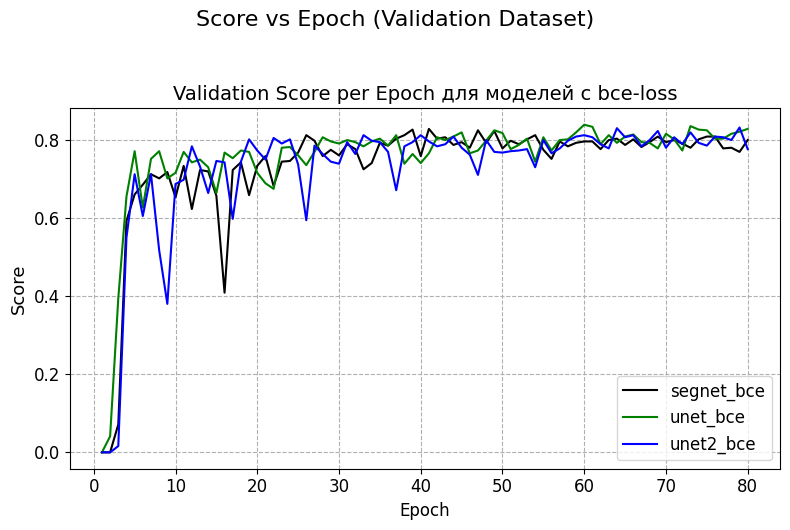

In [58]:
def plot_validation_score(tr_segnet_bce, tr_unet_bce, tr_unet2_bce):
    x = np.arange(80) + 1
    fig, ax = plt.subplots(figsize=(8, 5))

    y1 = tr_segnet_bce["val"]["score"]
    y2 = tr_unet_bce["val"]["score"]
    y3 = tr_unet2_bce["val"]["score"]

    ax.plot(x, y1, label="segnet_bce", color="black")
    ax.plot(x, y2, label="unet_bce", color="green")
    ax.plot(x, y3, label="unet2_bce", color="blue")

    ax.legend(fontsize=12)
    ax.grid(linestyle="--")
    ax.tick_params(labelsize=12)
    ax.set_ylabel("Score", fontsize=13)
    ax.set_xlabel("Epoch", fontsize=12)
    ax.set_title("Validation Score per Epoch для моделей с bce-loss", fontsize=14)

    plt.suptitle("Score vs Epoch (Validation Dataset)", fontsize=16, y=1.05)
    plt.tight_layout()
    plt.show()

plot_validation_score(tr_segnet_bce, tr_unet_bce, tr_unet2_bce)


В данном случае лучшей можно признать модель  unet. Score на 80 эпохах выше, а loss нижe, чем у остальных.

### Графики для моделей с tversky-loss.

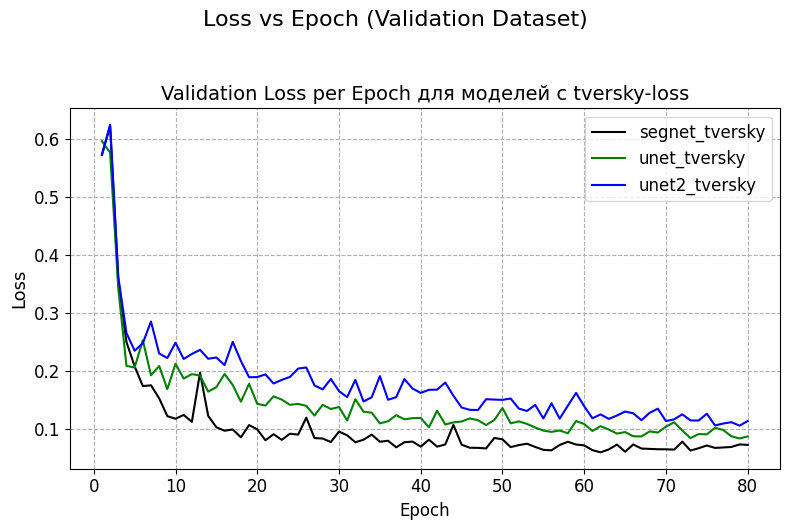

In [59]:

def plot_validation_losses(tr_segnet_tversky, tr_unet_tversky, tr_unet2_tversky):
    x = np.arange(80) + 1
    fig, ax = plt.subplots(figsize=(8, 5))

    y1 = tr_segnet_tversky["val"]["loss"]
    y2 = tr_unet_tversky["val"]["loss"]
    y3 = tr_unet2_tversky["val"]["loss"]

    ax.plot(x, y1, label="segnet_tversky", color="black")
    ax.plot(x, y2, label="unet_tversky", color="green")
    ax.plot(x, y3, label="unet2_tversky", color="blue")

    ax.legend(fontsize=12)
    ax.grid(linestyle="--")
    ax.tick_params(labelsize=12)
    ax.set_ylabel("Loss", fontsize=13)
    ax.set_xlabel("Epoch", fontsize=12)
    ax.set_title("Validation Loss per Epoch для моделей c tversky-loss", fontsize=14)

    plt.suptitle("Loss vs Epoch (Validation Dataset)", fontsize=16, y=1.05)
    plt.tight_layout()
    plt.show()

# Вызов функции для визуализации
plot_validation_losses(tr_segnet_tversky, tr_unet_tversky, tr_unet2_tversky)


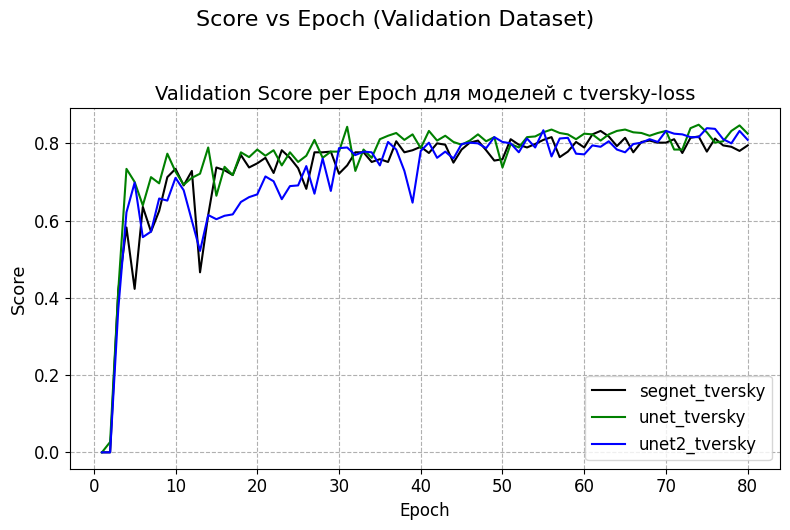

In [60]:
def plot_validation_score(tr_segnet_tversky, tr_unet_tversky, tr_unet2_tversky):
    x = np.arange(80) + 1
    fig, ax = plt.subplots(figsize=(8, 5))

    y1 = tr_segnet_tversky["val"]["score"]
    y2 = tr_unet_tversky["val"]["score"]
    y3 = tr_unet2_tversky["val"]["score"]

    ax.plot(x, y1, label="segnet_tversky", color="black")
    ax.plot(x, y2, label="unet_tversky", color="green")
    ax.plot(x, y3, label="unet2_tversky", color="blue")

    ax.legend(fontsize=12)
    ax.grid(linestyle="--")
    ax.tick_params(labelsize=12)
    ax.set_ylabel("Score", fontsize=13)
    ax.set_xlabel("Epoch", fontsize=12)
    ax.set_title("Validation Score per Epoch для моделей c tversky-loss", fontsize=14)

    plt.suptitle("Score vs Epoch (Validation Dataset)", fontsize=16, y=1.05)
    plt.tight_layout()
    plt.show()

plot_validation_score(tr_segnet_tversky, tr_unet_tversky, tr_unet2_tversky)


Аналогично, лучшей можно признать модель  unet. Score на 80 эпохах выше, а loss нижу, чем у остальных.

### [Графики для моделей с focal-loss.](https://)

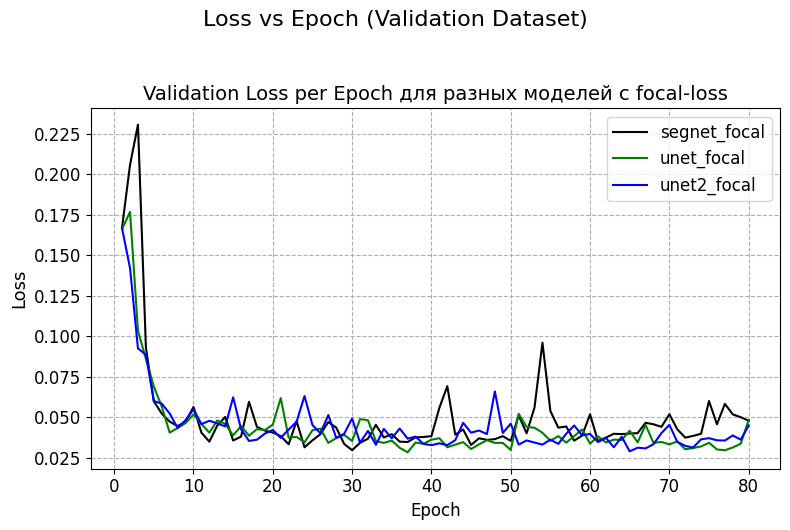

In [61]:
def plot_validation_losses(tr_segnet_focal, tr_unet_focal, tr_unet2_focal):
    x = np.arange(80) + 1
    fig, ax = plt.subplots(figsize=(8, 5))

    y1 = tr_segnet_focal["val"]["loss"]
    y2 = tr_unet_focal["val"]["loss"]
    y3 = tr_unet2_focal["val"]["loss"]

    ax.plot(x, y1, label="segnet_focal", color="black")
    ax.plot(x, y2, label="unet_focal", color="green")
    ax.plot(x, y3, label="unet2_focal", color="blue")

    ax.legend(fontsize=12)
    ax.grid(linestyle="--")
    ax.tick_params(labelsize=12)
    ax.set_ylabel("Loss", fontsize=13)
    ax.set_xlabel("Epoch", fontsize=12)
    ax.set_title("Validation Loss per Epoch для разных моделей c focal-loss", fontsize=14)

    plt.suptitle("Loss vs Epoch (Validation Dataset)", fontsize=16, y=1.05)
    plt.tight_layout()
    plt.show()

# Вызов функции для визуализации
plot_validation_losses(tr_segnet_focal, tr_unet_focal, tr_unet2_focal)


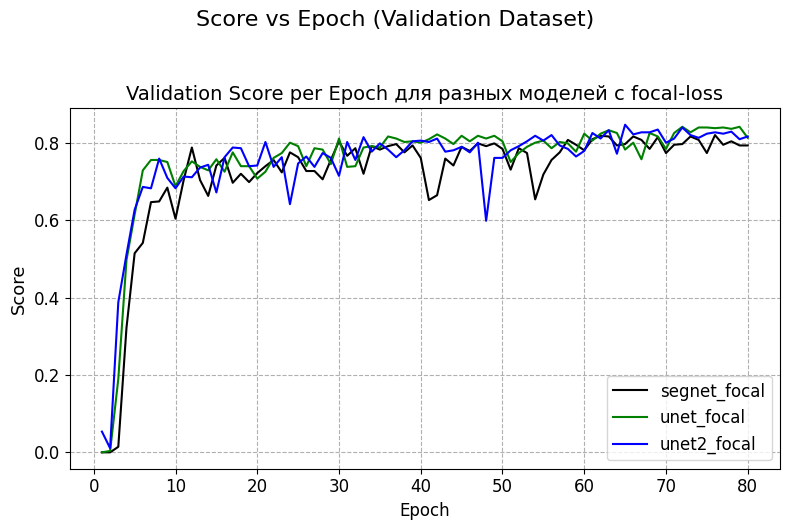

In [62]:
def plot_validation_score(tr_segnet_focal, tr_unet_focal, tr_unet2_focal):
    x = np.arange(80) + 1
    fig, ax = plt.subplots(figsize=(8, 5))

    y1 = tr_segnet_focal["val"]["score"]
    y2 = tr_unet_focal["val"]["score"]
    y3 = tr_unet2_focal["val"]["score"]

    ax.plot(x, y1, label="segnet_focal", color="black")
    ax.plot(x, y2, label="unet_focal", color="green")
    ax.plot(x, y3, label="unet2_focal", color="blue")

    ax.legend(fontsize=12)
    ax.grid(linestyle="--")
    ax.tick_params(labelsize=12)
    ax.set_ylabel("Score", fontsize=13)
    ax.set_xlabel("Epoch", fontsize=12)
    ax.set_title("Validation Score per Epoch для разных моделей c focal-loss", fontsize=14)

    plt.suptitle("Score vs Epoch (Validation Dataset)", fontsize=16, y=1.05)
    plt.tight_layout()
    plt.show()

# Вызов функции для визуализации
plot_validation_score(tr_segnet_focal, tr_unet_focal, tr_unet2_focal)


Аналогично, лучшей можно признать модель  unet. Score на 80 эпохах выше, а loss ниже, чем у остальных.

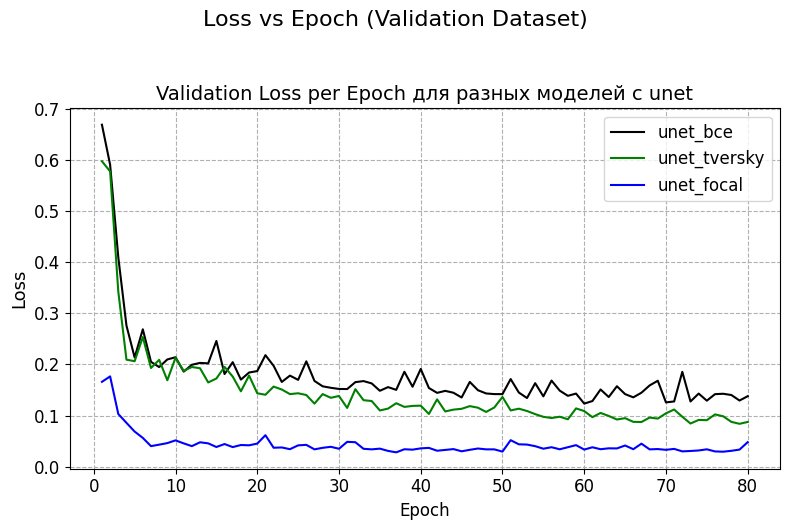

In [63]:
def plot_validation_losses(tr_unet_bce, tr_unet_tversky, tr_unet_focal):
    x = np.arange(80) + 1
    fig, ax = plt.subplots(figsize=(8, 5))

    y1 = tr_unet_bce["val"]["loss"]
    y2 = tr_unet_tversky["val"]["loss"]
    y3 = tr_unet_focal["val"]["loss"]

    ax.plot(x, y1, label="unet_bce", color="black")
    ax.plot(x, y2, label="unet_tversky", color="green")
    ax.plot(x, y3, label="unet_focal", color="blue")

    ax.legend(fontsize=12)
    ax.grid(linestyle="--")
    ax.tick_params(labelsize=12)
    ax.set_ylabel("Loss", fontsize=13)
    ax.set_xlabel("Epoch", fontsize=12)
    ax.set_title("Validation Loss per Epoch для разных моделей c unet", fontsize=14)

    plt.suptitle("Loss vs Epoch (Validation Dataset)", fontsize=16, y=1.05)
    plt.tight_layout()
    plt.show()

# Вызов функции для визуализации
plot_validation_losses(tr_unet_bce, tr_unet_tversky, tr_unet_focal)


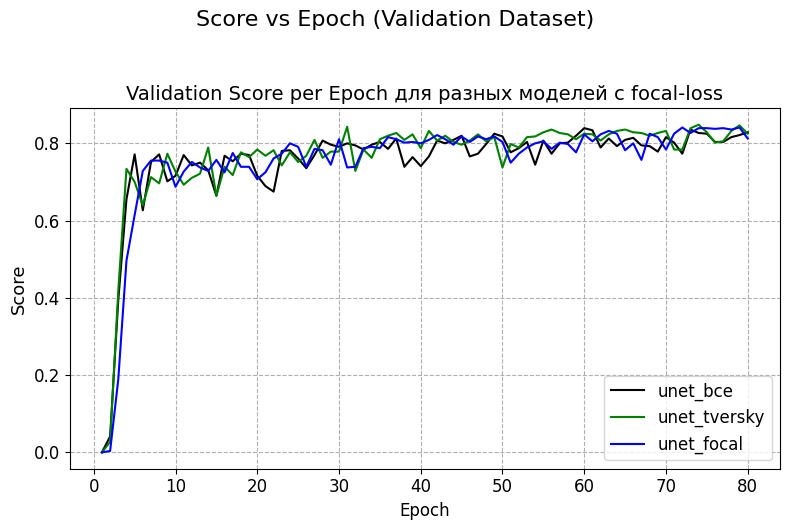

In [64]:
def plot_validation_score(tr_unet_bce, tr_unet_tversky, tr_unet_focal):
    x = np.arange(80) + 1
    fig, ax = plt.subplots(figsize=(8, 5))

    y1 = tr_unet_bce["val"]["score"]
    y2 = tr_unet_tversky["val"]["score"]
    y3 = tr_unet_focal["val"]["score"]

    ax.plot(x, y1, label="unet_bce", color="black")
    ax.plot(x, y2, label="unet_tversky", color="green")
    ax.plot(x, y3, label="unet_focal", color="blue")

    ax.legend(fontsize=12)
    ax.grid(linestyle="--")
    ax.tick_params(labelsize=12)
    ax.set_ylabel("Score", fontsize=13)
    ax.set_xlabel("Epoch", fontsize=12)
    ax.set_title("Validation Score per Epoch для разных моделей c focal-loss", fontsize=14)

    plt.suptitle("Score vs Epoch (Validation Dataset)", fontsize=16, y=1.05)
    plt.tight_layout()
    plt.show()

# Вызов функции для визуализации
plot_validation_score(tr_unet_bce, tr_unet_tversky, tr_unet_focal)


Лучшей из всех обученных моделей можно признать модель unet_focal вне зависимости от loss.

## На валидационной части:


In [73]:
y = [segnet_bce_val_score, segnet_dice_val_score, segnet_focal_val_score, segnet_tversky_val_score,
     unet_bce_val_score, unet_focal_val_score, unet_tversky_val_score,
     unet2_bce_val_score, unet2_focal_val_score, unet2_tversky_val_score]

x = ['segnet_bce', 'segnet_dice', 'segnet_focal', 'segnet_tversky',
     'unet_bce', 'unet_focal', 'unet_tversky',
     'unet2_bce', 'unet2_focal', 'unet2_tversky']

from matplotlib import cm
colors = cm.get_cmap("inferno", 12).colors

y, x, colors = zip(*sorted(zip(y, x, colors), reverse=True))

<ipython-input-73-6661bb136c86>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap("inferno", 12).colors


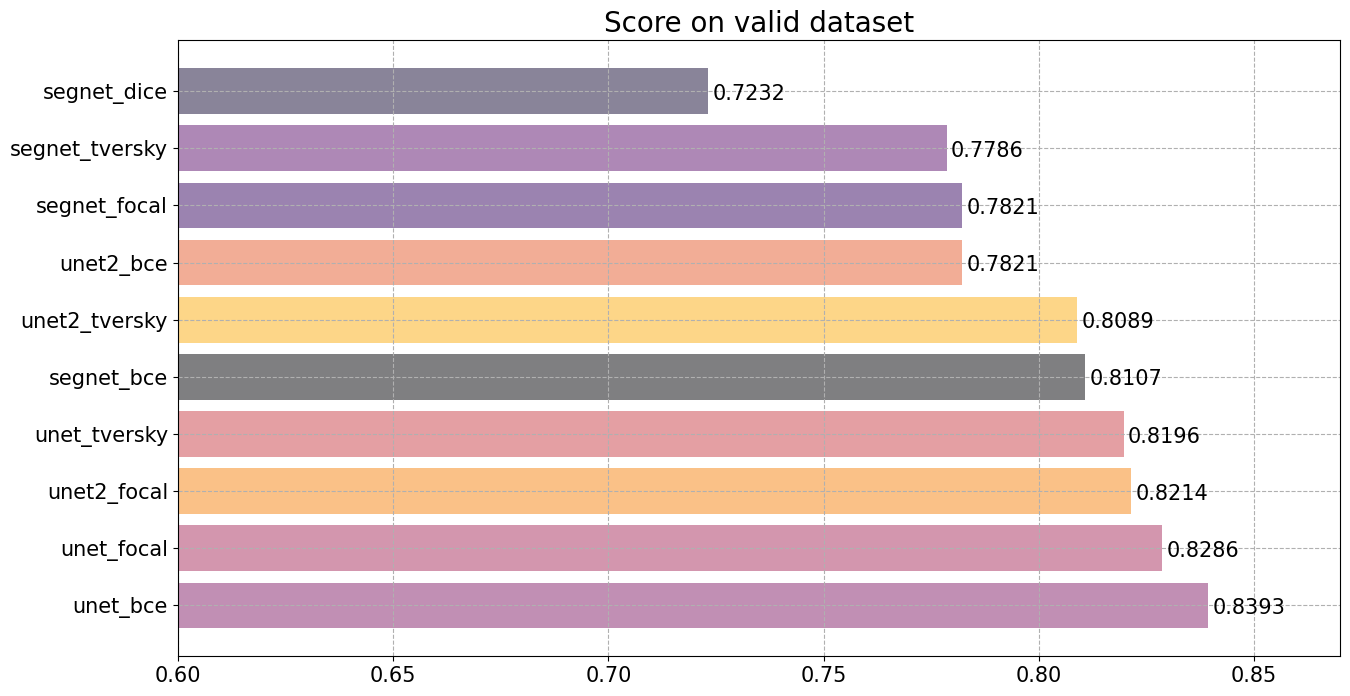

In [74]:
fig, ax = plt.subplots(figsize = (15, 8))
ax.barh(x, y, color = colors, alpha = 0.5)
ax.set_xlim(0.6, 0.87)
ax.tick_params(labelsize = 15)
for i in range(10):
    ax.text(y[i]+0.001, i - 0.15, f"{y[i]:.4f}", fontsize = 15)
    ax.grid(linestyle="--")
ax.set_title("Score on valid dataset", fontsize = 20)
plt.show()

## На тестовой части:

In [75]:
y = [segnet_bce_test_score, segnet_dice_test_score, segnet_focal_test_score, segnet_tversky_test_score,
     unet_bce_test_score, unet_focal_test_score, unet_tversky_test_score,
     unet2_bce_test_score, unet2_focal_test_score, unet2_tversky_test_score]

x = ['segnet_bce', 'segnet_dice', 'segnet_focal', 'segnet_tversky',
     'unet_bce', 'unet_focal', 'unet_tversky',
     'unet2_bce', 'unet2_focal', 'unet2_tversky']

from matplotlib import cm
colors = cm.get_cmap("inferno", 12).colors

y, x, colors = zip(*sorted(zip(y, x, colors), reverse=True))

<ipython-input-75-4e2c2abd5e85>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap("inferno", 12).colors


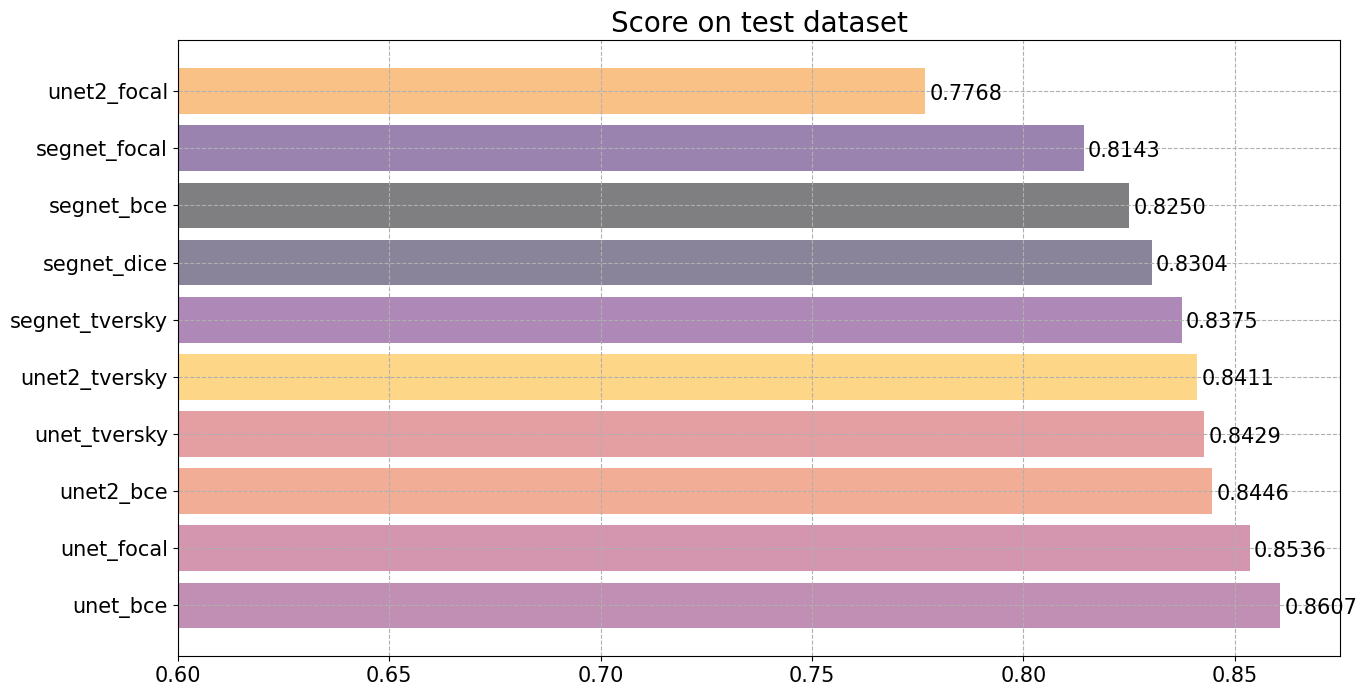

In [76]:
fig, ax = plt.subplots(figsize = (15, 8))
ax.barh(x, y, color = colors, alpha = 0.5)
ax.set_xlim(0.6, 0.875)
ax.tick_params(labelsize = 15)
for i in range(10):
    ax.text(y[i]+0.001, i - 0.15, f"{y[i]:.4f}", fontsize = 15)
    ax.grid(linestyle="--")
ax.set_title("Score on test dataset", fontsize = 20)
plt.show()

Можно сделать вывод, что лучше моделью является unet_bce. Модель не переобучается, ее можно попробовать обучить на большем количестве эпох. На втором месте по результатам - unet_focal.
